#Import

In [25]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data-retail
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
# %cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/data-retail


In [26]:
import os, warnings, random

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import joblib
from keras.models import load_model

# Set seeds to make the experiment more reproducible.
# def seed_everything(seed=0):
#     random.seed(seed)
#     np.random.seed(seed)
#     tf.random.set_seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     os.environ['TF_DETERMINISTIC_OPS'] = '1'

# seed = 0
# seed_everything(seed)
# warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

#Preprocessing

In [28]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [29]:
# get unique kategori value

group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019]
pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [30]:
display(clean_kategori.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
kodekategori,101.00,102.00,103.00,104.00,105.00,106.00,107.00,108.00,109.00,110.00,111.00,112.00,113.00,114.00,115.00,201.00,202.00,203.00,204.00,205.00,206.00,301.00,302.00,10101.00,10102.00,10103.00,10104.00,10105.00,10106.00,10107.00,10108.00,10109.00,10110.00,10111.00,10112.00,10113.00,10114.00,10115.00,10116.00,10117.00,10118.00,10119.00,10120.00,10121.00,10201.00,10202.00,10203.00,10204.00,10205.00,10206.00,10207.00,10208.00,10209.00,10210.00,10211.00,10212.00,10213.00,20101.00,20201.00,20402.00,20501.00,20502.00,20503.00,20504.00,20601.00,30101.00,30201.00,30202.00,30203.00,30204.00,30301.00,30302.00,30303.00,30304.00,30305.00,30306.00,30307.00,30308.00,30309.00,30310.00,30311.00,30312.00,30401.00,30402.00,30403.00,30404.00,30405.00,30406.00,30407.00,40101.00,40103.00,40201.00,40202.00,40203.00,40301.00,40302.00,40303.00,40304.00,40305.00,40306.00,40307.00,40308.00,40309.00,40312.00,40401.00,40402.00,40403.00,40404.00,40405.00,20301.00,40310.00,40311.00,40501.00,40601.00,20302.00,40502.00
kategori,['Baby Needs'],['Mens Care (2)'],['Healt & Beauty Care (3)'],['Kids Care (4)'],['Cleaning (5)'],['Homes (6)'],['Electronic & Tool kits (7)'],['Automotive (8)'],['Stationery (9)'],['Toys (10)'],['Sports (11)'],['Event Equipment (12)'],['Convection (13)'],['Shoes & Sandals (14)'],['Bag & Luggage (15)'],['Food (1)'],['Beverage (2)'],['Medicine (3)'],['Pets food (4)'],['Cigarette (5)'],['Fresh Food (6)'],['Others (1)'],['alisha collection'],['Makanan Bayi (Baby Food)'],['Bahan Kue (Baking Supplies)'],['Biskuit (Biscuit)'],['Roti dan Kue (Bread & Cake)'],['Sarapan Pagi (Breakfast)'],['Penganan Permen (Candy Confectionary)'],['Penganan Coklat (Chocolate Confectionary)'],['Makanan Mentah (Raw Food)'],['Ice'],['Makanan Masak (Cooked Food)'],['Bumbu Dapur (Seasoning)'],['Mie (Noodle)'],['Pasta'],['Makanan Ringan (Snack)'],['Beras (Rice)'],['Biji-bijian (Seeds)'],['Gula (Sugar)'],['Tepung (Flour)'],['Minyak Goreng (Cooking Oil)'],['Makanan Kaleng (Canned Food)'],['Makanan Hewan (Pet Food)'],['Susu (Milk)'],['Kopi (Coffe)'],['Teh (Tea)'],['Air (Water)'],['Minuman Buah (Juice)'],['Minuman Kesehatan (Healty Drink)'],['Minuman Berenergi (Energy Drink)'],['Minuman Isotonik (Isotonik Drink)'],['Minuman Penyegar (Refreshment)'],['Minuman Jeli (Jelly Drink)'],['Minuman Bersoda (Soft Drink)'],['Minuman Beralkohol (Alcoholic Drink)'],['Sirup (Syrup)'],['Buah (Fruit)'],['Sayur (Vegetable)'],['Air Tawar'],['Susu & Olahan (Dairy)'],['Harian (Daily)'],['Beku (Frozen)'],['Telur (Egg)'],['Produk Siap Makan (Ready To Eat)'],['Rokok (Cigarete)'],['Obat Dalam (Peroral)'],['Obat Luar (Topikal)'],['Vitamin & Suplemen (Vitamis & Supplements)'],['Alat Kesehatan (Health Appliance)'],['Perawatan Rambut (Hair Care)'],['Perawatan Wajah (Face Care)'],['Kosmetik (Cosmetic)'],['Tisu & Kapas (Tissues & Cotton)'],['Perawatan Gigi & Mulut (Oral Care)'],['Perawatan Tubuh (Body Care)'],['Perawatan Bayi (Baby Care)'],['Perawatan Anak (Kids Care)'],['Popok Bayi (Baby Diapers)'],['Pembalut Wanita (Sanitary Napkins)'],['Popok Dewasa (Adult Diapers)'],['Perawatan Pria (Mens Groming)'],['Perawatan Pakaian (Clothes Care)'],['Perawatan Dapur (Kitchen Care)'],['Perawatan Rumah (House Care)'],['Pengharum Rumah (Home Fragrances)'],['Pembasmi Serangga & Pengendali Hama (Insecti...,['Perawatan Tas & Sepatu Kulit (Leather Care)'],['Perawatan Otomotif (Automotive Care)'],['Mainan Lunak (Soft Toys)'],['Mainan Keras (Hard Toys)'],['Peralatan (Tools)'],['Perlengkapan (Supplies)'],['Fancies'],['Rumah Tangga (House Hold)'],['Dapur (Kitchen)'],['Kamar Mandi (Bath Room)'],['Kamar Tidur (Bed Room)'],['Peralatan & Perlengkapan Bayi (Equipment & B

In [31]:
# initiate the kategori list that will removed from dataset

kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [32]:
kategori_name_df = pd.DataFrame(kategori_remove_name)
# kategori_name_df.to_csv('kategori_delist.csv', index=False)

In [33]:
# drop unnecessary column
# df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
# df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
# df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
# df2020 = df2020.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
# df2021 = df2021.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

df2017 = df2017.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [34]:
# concat 3 dataframe to single df

# df = pd.concat([df2016, df2017, df2018]).reset_index(drop=True)
# df = pd.concat([df2016, df2017, df2018, df2019, df2020, df2021]).reset_index(drop=True)
df = pd.concat([df2017, df2018, df2019, df2020, df2021]).reset_index(drop=True)
# df = pd.concat([df2018, df2019, df2020, df2021]).reset_index(drop=True)

In [35]:
# remove strange value in each rows from barcode column

df['barcode'] = df['barcode'].str.split(' ').str[0]

In [36]:
# create new column named "month_year" to get number of month and year

# df['Year-Month'] = df['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df['month_year'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [37]:
# transform the value to number of month from all rows

# 2016-2021
# df['month_year'] = df['month_year'].map({'01-16':0,'02-16':1,'03-16':2,'04-16':3,'05-16':4,'06-16':5,'07-16':6,'08-16':7,'09-16':8,'10-16':9,'11-16':10,'12-16':11,
#                                           '01-17':12,'02-17':13,'03-17':14,'04-17':15,'05-17':16,'06-17':17,'07-17':18,'08-17':19,'09-17':20,'10-17':21,'11-17':22,'12-17':23,
#                                           '01-18':24,'02-18':25,'03-18':26,'04-18':27,'05-18':28,'06-18':29,'07-18':30,'08-18':31,'09-18':32,'10-18':33,'11-18':34,'12-18':35,
#                                           '01-19':36,'02-19':37,'03-19':38,'04-19':39,'05-19':40,'06-19':41,'07-19':42,'08-19':43,'09-19':44,'10-19':45,'11-19':46,'12-19':47,
#                                           '01-20':48,'02-20':49,'03-20':50,'04-20':51,'05-20':52,'06-20':53,'07-20':54,'08-20':55,'09-20':56,'10-20':57,'11-20':58,'12-20':59,
#                                           '01-21':60,'02-21':61,'03-21':62,'04-21':63,'05-21':64,'06-21':65,'07-21':66,'08-21':67,'09-21':68,'10-21':69,'11-21':70,'12-21':71})

# 2017-2021
df['month_year'] = df['month_year'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})

# 2018-2021
# df['month_year'] = df['month_year'].map({'01-18':0,'02-18':1,'03-18':2,'04-18':3,'05-18':4,'06-18':5,'07-18':6,'08-18':7,'09-18':8,'10-18':9,'11-18':10,'12-18':11,
#                                           '01-19':12,'02-19':13,'03-19':14,'04-19':15,'05-19':16,'06-19':17,'07-19':18,'08-19':19,'09-19':20,'10-19':21,'11-19':22,'12-19':23,
#                                           '01-20':24,'02-20':25,'03-20':26,'04-20':27,'05-20':28,'06-20':29,'07-20':30,'08-20':31,'09-20':32,'10-20':33,'11-20':34,'12-20':35,
#                                           '01-21':36,'02-21':37,'03-21':38,'04-21':39,'05-21':40,'06-21':41,'07-21':42,'08-21':43,'09-21':44,'10-21':45,'11-21':46,'12-21':47})

In [38]:
# df["barcode"] = df["barcode"].astype(str).astype(int)
# df["kodejenis"] = df["kodejenis"].astype(str).astype(float)

In [39]:
# drop unnecessary kategori

# init = df.copy()
# init = init[~init['kategori'].isin(kategori_remove_name)].reset_index(drop=True)
# df = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

In [40]:
display(df.info())
display(df.head())
# RangeIndex: 11533836 entries, 0 to 11533835 sebelum nambah daftar kategori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352897 entries, 0 to 12352896
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   namabarang    object        
 2   satuan        object        
 3   qty           float64       
 4   barcode       object        
 5   kodejenis     object        
 6   jenis         object        
 7   kodekategori  float64       
 8   kategori      object        
 9   month_year    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 942.5+ MB


None

,tgl,namabarang,satuan,qty,barcode,kodejenis,jenis,kodekategori,kategori,month_year
0,2017-10-08 10:21:56.667,SHINZUI SOAP REGULAR75GR*144,PCS,2.00,8992946511790,10301,Bath Care (1),103.00,Healt & Beauty Care (3),9
1,2017-06-10 15:14:28.343,KOL PUTIH/KG,KG,0.19,00172677,20607,Vegetable (7),206.00,Fresh Food (6),5
2,2017-09-18 20:38:05.290,PASEO SMART TOILET WHT 6143*64,PCS,1.00,8993053211672,10507,Tissue & Cotton (7),105.00,Cleaning (5),8
3,2017-02-03 19:58:25.060,POND'S WB NIGHT CREAM 20GR/48,PCS,1.00,8999999056872,10302,Cosmetic & Accessories (2),103.00,Healt & Beauty Care (3),1
4,2017-05-27 15:44:34.500,INDOMIE RASA SOTO SPESIAL 75GR,PCS,2.00,089686910384,20113,Noodle & Pasta (13),201.00,Food (1),4


# DF 2017 - 2021

In [ ]:
train_monthly = df[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt > 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

,month_year,kodejenis,barcode,qty_cnt,qty_cnt_month
0,0,10101,4902430600859,2.00,NaN
1,0,10101,4902430601191,4.00,2.00
2,0,10101,4902430601238,4.00,1.00
3,0,10101,4902430601245,8.00,NaN
4,0,10101,4902430601320,1.00,1.00


In [ ]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_year,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,00100809,01011601,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02,12.75,10.78,27.13,32.93,18.57,11.34,13.62,12.14,8.19,4.22,2.76,3.97,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00100809,20604,8.04,10.89,15.34,14.70,15.63,20.85,11.92,16.73,14.30,14.26,11.93,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00113731,02020101,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,3.46,4.43,4.75,6.09,4.07,5.42,4.27,4.89,3.76,3.62,2.89,3.61,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32
3,00113731,20607,1.51,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00125789,02010120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,9.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
monthly_series_drop = monthly_series.drop(['kodejenis'], axis=1)

In [ ]:
summed_data = monthly_series_drop.groupby('barcode').agg('sum').reset_index(False)
summed_data.head()

month_year,barcode,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,00100809,8.04,10.89,15.34,14.70,15.63,20.85,11.92,16.73,14.30,14.26,11.93,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02,12.75,10.78,27.13,32.93,18.57,11.34,13.62,12.14,8.19,4.22,2.76,3.97,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00113731,1.51,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,3.46,4.43,4.75,6.09,4.07,5.42,4.27,4.89,3.76,3.62,2.89,3.61,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32
2,00125789,0.00,0.00,0.00,0.00,6.52,0.00,30.61,1.15,0.00,0.00,1.27,24.00,0.00,0.00,0.00,0.84,0.67,23.76,7.98,21.34,0.00,18.12,0.00,1.40,0.72,0.00,0.00,0.00,0.00,9.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00129213,0.00,38.54,15.94,11.55,0.00,0.00,0.00,0.00,1.40,0.00,34.27,20.00,8.27,1.42,0.00,0.00,0.00,0.00,0.63,0.00,0.00,5.38,31.02,22.49,7.61,15.97,10.74,6.98,10.05,0.00,0.00,0.00,0.00,0.00,17.51,0.00,0.00,0.00,5.13,0.60,2.79,8.18,0.00,0.00,0.00,4.83,7.70,1.50,38.39,0.00,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00133142,0.00,4.19,6.89,0.00,0.00,0.00,0.00,3.46,0.00,0.00,0.00,0.00,0.00,0.00,10.13,24.48,2.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# first_month = 47
first_month = 46
last_month = 59
# first_month = 34
# last_month = 47
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode'], row['kodejenis']]
        # serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode', 'kodejenis']
# columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,label
0,00100809,01011601,2.76,3.97,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68
1,00100809,01011601,3.97,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
2,00100809,20604,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00100809,20604,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00113731,02020101,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72


In [ ]:
data_series = data_series.drop(['barcode', 'kodejenis'], axis=1)
# data_series = data_series.drop(['barcode'], axis=1)

In [ ]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [ ]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

Train set (84029, 12)
Validation set (9337, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
28655,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11327,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
26232,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
69814,35.00,29.00,0.00,21.00,0.00,0.00,0.00,30.00,24.00,34.00,16.00,27.00
4421,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [ ]:
# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(-1, 1))
# x_train_scaled = scaler.fit_transform(train)
# x_valid_scaled = scaler.fit_transform(valid)

In [ ]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))
# X_train = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
# X_valid = x_valid_scaled.reshape((x_valid_scaled.shape[0], x_valid_scaled.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)
# print(X_train)

# initial value count
# Train set reshaped (40697, 12, 1)
# Validation set reshaped (4522, 12, 1)

Train set reshaped (84029, 12, 1)
Validation set reshaped (9337, 12, 1)


In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
10504/10504 - 46s - loss: 28.2542 - accuracy: 0.7384 - val_loss: 21.0918 - val_accuracy: 0.7430 - 46s/epoch - 4ms/step
Epoch 2/1000
10504/10504 - 45s - loss: 20.1049 - accuracy: 0.7441 - val_loss: 17.2343 - val_accuracy: 0.7434 - 45s/epoch - 4ms/step
Epoch 3/1000
10504/10504 - 45s - loss: 17.0218 - accuracy: 0.7433 - val_loss: 15.2779 - val_accuracy: 0.7406 - 45s/epoch - 4ms/step
Epoch 4/1000
10504/10504 - 45s - loss: 15.3603 - accuracy: 0.7425 - val_loss: 14.1562 - val_accuracy: 0.7425 - 45s/epoch - 4ms/step
Epoch 5/1000
10504/10504 - 44s - loss: 14.4102 - accuracy: 0.7419 - val_loss: 13.5062 - val_accuracy: 0.7422 - 44s/epoch - 4ms/step
Epoch 6/1000
10504/10504 - 45s - loss: 13.8365 - accuracy: 0.7419 - val_loss: 13.1336 - val_accuracy: 0.7402 - 45s/epoch - 4ms/step
Epoch 7/1000
10504/10504 - 45s - loss: 13.4517 - accuracy: 0.7417 - val_loss: 12.8647 - val_accuracy: 0.7427 - 45s/epoch - 4ms/step
Epoch 8/1000
10504/10504 - 49s - loss: 13.1929 - accuracy: 0.7418 - val_loss

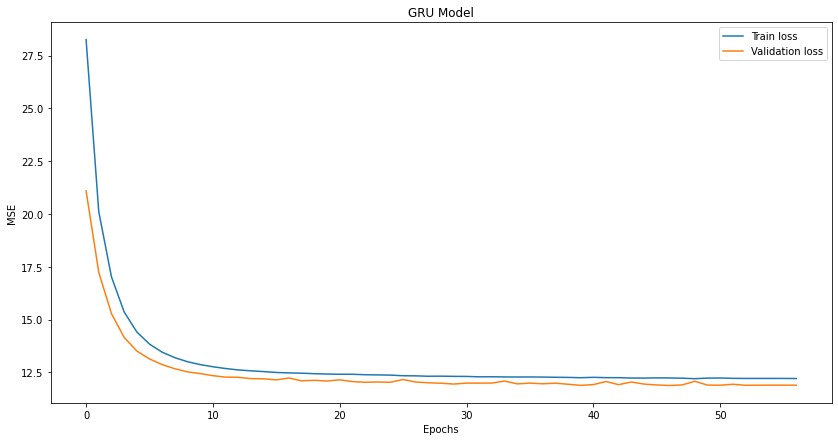

Epoch 1/1000
10504/10504 - 54s - loss: 25.4139 - accuracy: 0.7336 - val_loss: 17.9130 - val_accuracy: 0.7427 - 54s/epoch - 5ms/step
Epoch 2/1000
10504/10504 - 53s - loss: 16.7045 - accuracy: 0.7420 - val_loss: 14.5204 - val_accuracy: 0.7388 - 53s/epoch - 5ms/step
Epoch 3/1000
10504/10504 - 52s - loss: 14.3653 - accuracy: 0.7413 - val_loss: 13.2996 - val_accuracy: 0.7426 - 52s/epoch - 5ms/step
Epoch 4/1000
10504/10504 - 54s - loss: 13.4653 - accuracy: 0.7410 - val_loss: 12.8057 - val_accuracy: 0.7430 - 54s/epoch - 5ms/step
Epoch 5/1000
10504/10504 - 53s - loss: 13.0376 - accuracy: 0.7410 - val_loss: 12.5257 - val_accuracy: 0.7395 - 53s/epoch - 5ms/step
Epoch 6/1000
10504/10504 - 53s - loss: 12.7886 - accuracy: 0.7406 - val_loss: 12.4003 - val_accuracy: 0.7382 - 53s/epoch - 5ms/step
Epoch 7/1000
10504/10504 - 52s - loss: 12.6391 - accuracy: 0.7395 - val_loss: 12.2605 - val_accuracy: 0.7420 - 52s/epoch - 5ms/step
Epoch 8/1000
10504/10504 - 52s - loss: 12.5419 - accuracy: 0.7382 - val_loss

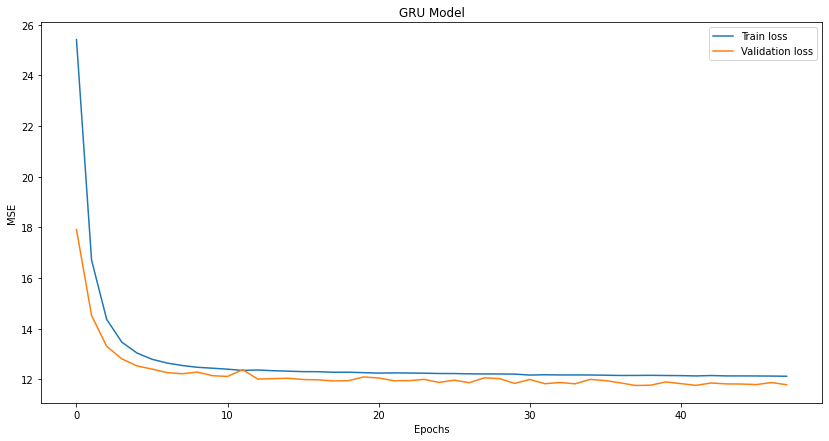

Epoch 1/1000
10504/10504 - 57s - loss: 20.4130 - accuracy: 0.7401 - val_loss: 14.2376 - val_accuracy: 0.7422 - 57s/epoch - 5ms/step
Epoch 2/1000
10504/10504 - 55s - loss: 13.7876 - accuracy: 0.7390 - val_loss: 12.7622 - val_accuracy: 0.7405 - 55s/epoch - 5ms/step
Epoch 3/1000
10504/10504 - 54s - loss: 12.8738 - accuracy: 0.7399 - val_loss: 12.2761 - val_accuracy: 0.7432 - 54s/epoch - 5ms/step
Epoch 4/1000
10504/10504 - 54s - loss: 12.5759 - accuracy: 0.7405 - val_loss: 12.1452 - val_accuracy: 0.7364 - 54s/epoch - 5ms/step
Epoch 5/1000
10504/10504 - 54s - loss: 12.4440 - accuracy: 0.7399 - val_loss: 12.1160 - val_accuracy: 0.7401 - 54s/epoch - 5ms/step
Epoch 6/1000
10504/10504 - 55s - loss: 12.3732 - accuracy: 0.7389 - val_loss: 12.0929 - val_accuracy: 0.7388 - 55s/epoch - 5ms/step
Epoch 7/1000
10504/10504 - 54s - loss: 12.3316 - accuracy: 0.7371 - val_loss: 12.1785 - val_accuracy: 0.7370 - 54s/epoch - 5ms/step
Epoch 8/1000
10504/10504 - 54s - loss: 12.2965 - accuracy: 0.7369 - val_loss

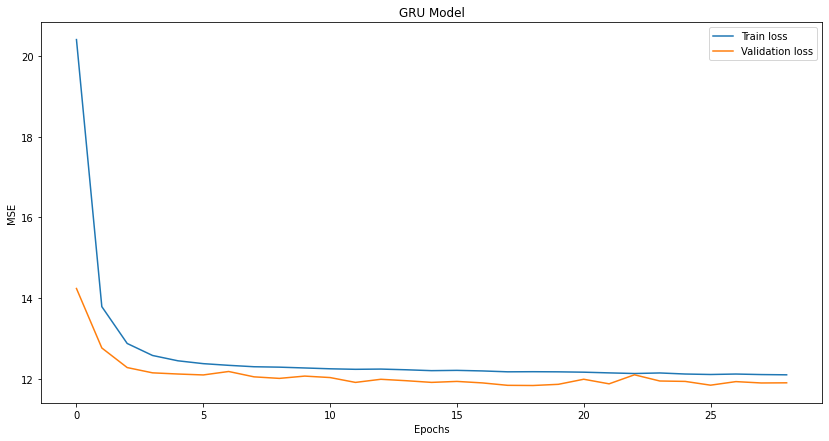

Epoch 1/1000
10504/10504 - 61s - loss: 16.3310 - accuracy: 0.7399 - val_loss: 12.6498 - val_accuracy: 0.7364 - 61s/epoch - 6ms/step
Epoch 2/1000
10504/10504 - 59s - loss: 12.7345 - accuracy: 0.7390 - val_loss: 12.3636 - val_accuracy: 0.7414 - 59s/epoch - 6ms/step
Epoch 3/1000
10504/10504 - 60s - loss: 12.4801 - accuracy: 0.7401 - val_loss: 12.1600 - val_accuracy: 0.7392 - 60s/epoch - 6ms/step
Epoch 4/1000
10504/10504 - 60s - loss: 12.4174 - accuracy: 0.7387 - val_loss: 12.1825 - val_accuracy: 0.7266 - 60s/epoch - 6ms/step
Epoch 5/1000
10504/10504 - 59s - loss: 12.3671 - accuracy: 0.7375 - val_loss: 12.0149 - val_accuracy: 0.7391 - 59s/epoch - 6ms/step
Epoch 6/1000
10504/10504 - 59s - loss: 12.3320 - accuracy: 0.7367 - val_loss: 12.0084 - val_accuracy: 0.7385 - 59s/epoch - 6ms/step
Epoch 7/1000
10504/10504 - 60s - loss: 12.3083 - accuracy: 0.7352 - val_loss: 12.0394 - val_accuracy: 0.7426 - 60s/epoch - 6ms/step
Epoch 8/1000
10504/10504 - 60s - loss: 12.2756 - accuracy: 0.7348 - val_loss

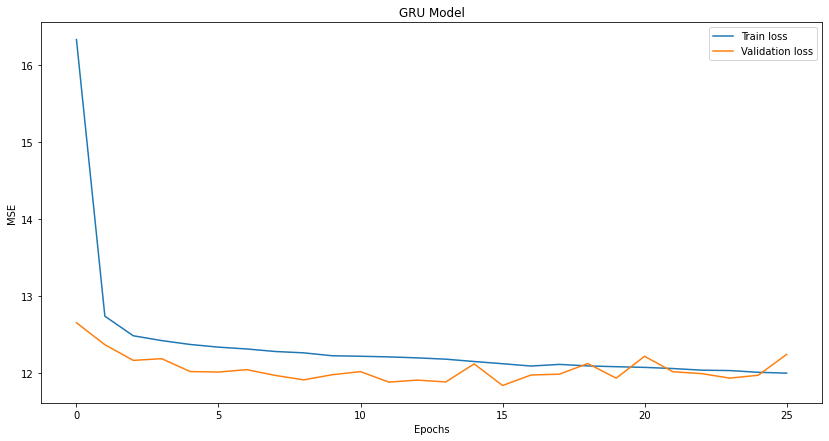

In [ ]:
auto_model(8, 8) # normal approach
auto_model(8, 16)
auto_model(8, 32)
auto_model(8, 64)

Epoch 1/1000
5252/5252 - 29s - loss: 33.7637 - accuracy: 0.7348 - val_loss: 26.2660 - val_accuracy: 0.7258 - 29s/epoch - 5ms/step
Epoch 2/1000
5252/5252 - 27s - loss: 25.4312 - accuracy: 0.7337 - val_loss: 21.8117 - val_accuracy: 0.7395 - 27s/epoch - 5ms/step
Epoch 3/1000
5252/5252 - 26s - loss: 21.4417 - accuracy: 0.7435 - val_loss: 18.8264 - val_accuracy: 0.7462 - 26s/epoch - 5ms/step
Epoch 4/1000
5252/5252 - 27s - loss: 18.7625 - accuracy: 0.7458 - val_loss: 16.8407 - val_accuracy: 0.7446 - 27s/epoch - 5ms/step
Epoch 5/1000
5252/5252 - 27s - loss: 16.9849 - accuracy: 0.7459 - val_loss: 15.5270 - val_accuracy: 0.7439 - 27s/epoch - 5ms/step
Epoch 6/1000
5252/5252 - 27s - loss: 15.7860 - accuracy: 0.7445 - val_loss: 14.6443 - val_accuracy: 0.7430 - 27s/epoch - 5ms/step
Epoch 7/1000
5252/5252 - 27s - loss: 14.9722 - accuracy: 0.7425 - val_loss: 14.0598 - val_accuracy: 0.7416 - 27s/epoch - 5ms/step
Epoch 8/1000
5252/5252 - 27s - loss: 14.4026 - accuracy: 0.7407 - val_loss: 13.6514 - val_

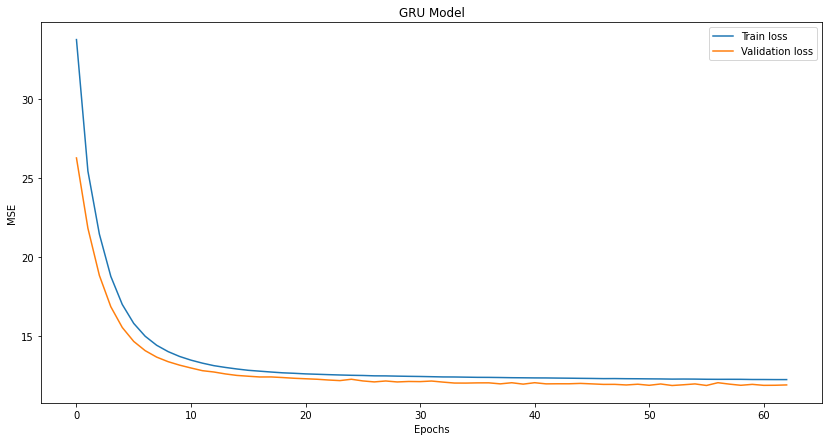

Epoch 1/1000
5252/5252 - 29s - loss: 27.6435 - accuracy: 0.7332 - val_loss: 20.5083 - val_accuracy: 0.7388 - 29s/epoch - 6ms/step
Epoch 2/1000
5252/5252 - 28s - loss: 19.2572 - accuracy: 0.7422 - val_loss: 16.4453 - val_accuracy: 0.7406 - 28s/epoch - 5ms/step
Epoch 3/1000
5252/5252 - 27s - loss: 16.1017 - accuracy: 0.7406 - val_loss: 14.5001 - val_accuracy: 0.7407 - 27s/epoch - 5ms/step
Epoch 4/1000
5252/5252 - 27s - loss: 14.5742 - accuracy: 0.7399 - val_loss: 13.5667 - val_accuracy: 0.7394 - 27s/epoch - 5ms/step
Epoch 5/1000
5252/5252 - 27s - loss: 13.7923 - accuracy: 0.7394 - val_loss: 13.0395 - val_accuracy: 0.7379 - 27s/epoch - 5ms/step
Epoch 6/1000
5252/5252 - 27s - loss: 13.3416 - accuracy: 0.7387 - val_loss: 12.7261 - val_accuracy: 0.7382 - 27s/epoch - 5ms/step
Epoch 7/1000
5252/5252 - 28s - loss: 13.0515 - accuracy: 0.7375 - val_loss: 12.5455 - val_accuracy: 0.7384 - 28s/epoch - 5ms/step
Epoch 8/1000
5252/5252 - 28s - loss: 12.8635 - accuracy: 0.7374 - val_loss: 12.3791 - val_

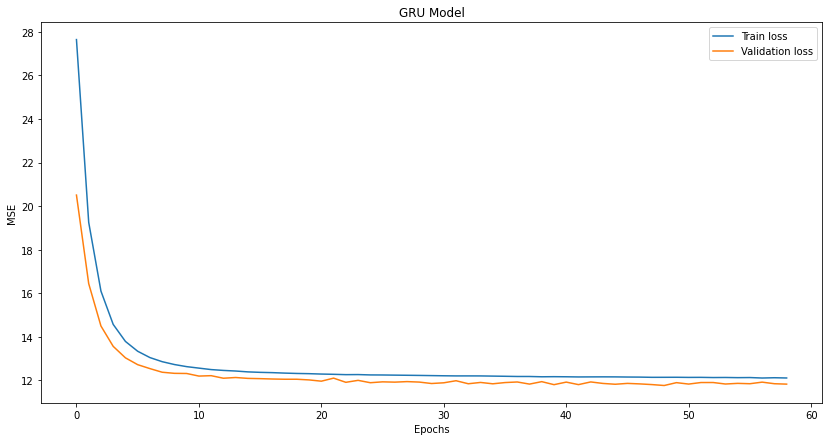

Epoch 1/1000
5252/5252 - 30s - loss: 23.4030 - accuracy: 0.7386 - val_loss: 15.8803 - val_accuracy: 0.7466 - 30s/epoch - 6ms/step
Epoch 2/1000
5252/5252 - 28s - loss: 15.0142 - accuracy: 0.7406 - val_loss: 13.4379 - val_accuracy: 0.7375 - 28s/epoch - 5ms/step
Epoch 3/1000
5252/5252 - 28s - loss: 13.4628 - accuracy: 0.7392 - val_loss: 12.7325 - val_accuracy: 0.7351 - 28s/epoch - 5ms/step
Epoch 4/1000
5252/5252 - 28s - loss: 12.9168 - accuracy: 0.7394 - val_loss: 12.3661 - val_accuracy: 0.7396 - 28s/epoch - 5ms/step
Epoch 5/1000
5252/5252 - 28s - loss: 12.6698 - accuracy: 0.7400 - val_loss: 12.1599 - val_accuracy: 0.7409 - 28s/epoch - 5ms/step
Epoch 6/1000
5252/5252 - 28s - loss: 12.5421 - accuracy: 0.7396 - val_loss: 12.1473 - val_accuracy: 0.7380 - 28s/epoch - 5ms/step
Epoch 7/1000
5252/5252 - 28s - loss: 12.4666 - accuracy: 0.7387 - val_loss: 12.0470 - val_accuracy: 0.7401 - 28s/epoch - 5ms/step
Epoch 8/1000
5252/5252 - 28s - loss: 12.4196 - accuracy: 0.7383 - val_loss: 12.0476 - val_

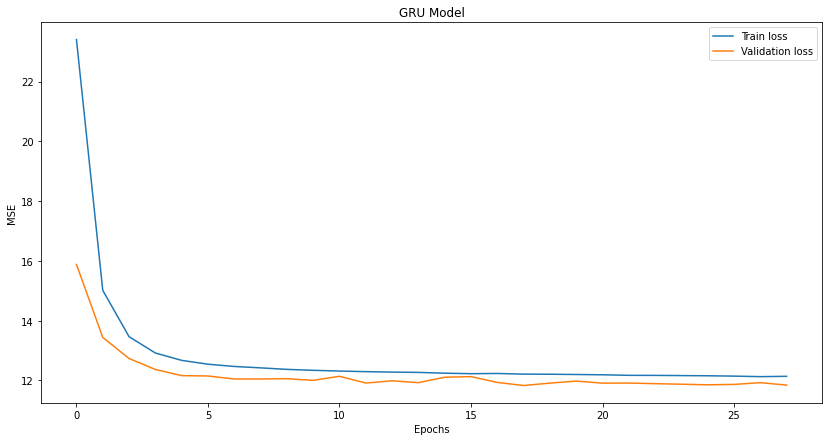

Epoch 1/1000
5252/5252 - 33s - loss: 18.1033 - accuracy: 0.7397 - val_loss: 13.3364 - val_accuracy: 0.7352 - 33s/epoch - 6ms/step
Epoch 2/1000
5252/5252 - 31s - loss: 13.1599 - accuracy: 0.7371 - val_loss: 12.4114 - val_accuracy: 0.7377 - 31s/epoch - 6ms/step
Epoch 3/1000
5252/5252 - 31s - loss: 12.6216 - accuracy: 0.7387 - val_loss: 12.1486 - val_accuracy: 0.7374 - 31s/epoch - 6ms/step
Epoch 4/1000
5252/5252 - 30s - loss: 12.4621 - accuracy: 0.7398 - val_loss: 12.0272 - val_accuracy: 0.7429 - 30s/epoch - 6ms/step
Epoch 5/1000
5252/5252 - 30s - loss: 12.4085 - accuracy: 0.7396 - val_loss: 12.0008 - val_accuracy: 0.7384 - 30s/epoch - 6ms/step
Epoch 6/1000
5252/5252 - 31s - loss: 12.3542 - accuracy: 0.7378 - val_loss: 11.9598 - val_accuracy: 0.7372 - 31s/epoch - 6ms/step
Epoch 7/1000
5252/5252 - 31s - loss: 12.3321 - accuracy: 0.7376 - val_loss: 11.9562 - val_accuracy: 0.7418 - 31s/epoch - 6ms/step
Epoch 8/1000
5252/5252 - 31s - loss: 12.3103 - accuracy: 0.7375 - val_loss: 12.0639 - val_

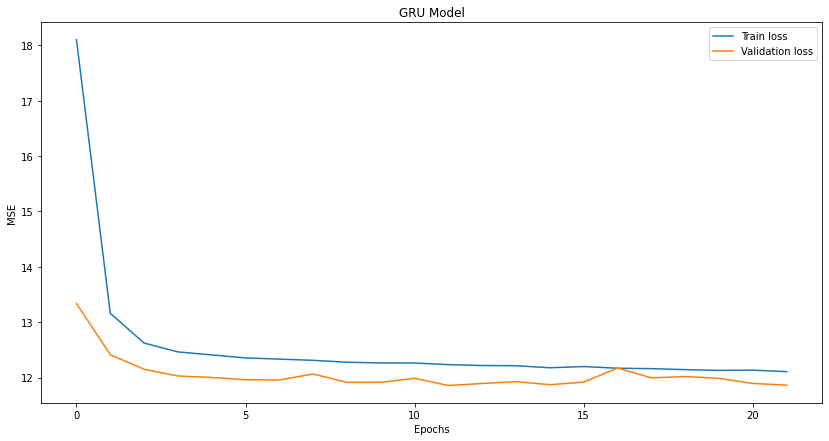

In [ ]:
auto_model(16, 8) # normal approach
auto_model(16, 16)
auto_model(16, 32)
auto_model(16, 64)

Epoch 1/1000
2626/2626 - 15s - loss: 35.2339 - accuracy: 0.7472 - val_loss: 28.6181 - val_accuracy: 0.7292 - 15s/epoch - 6ms/step
Epoch 2/1000
2626/2626 - 13s - loss: 28.1969 - accuracy: 0.7313 - val_loss: 24.5176 - val_accuracy: 0.7402 - 13s/epoch - 5ms/step
Epoch 3/1000
2626/2626 - 13s - loss: 24.6333 - accuracy: 0.7399 - val_loss: 21.9159 - val_accuracy: 0.7401 - 13s/epoch - 5ms/step
Epoch 4/1000
2626/2626 - 13s - loss: 22.1523 - accuracy: 0.7423 - val_loss: 19.9017 - val_accuracy: 0.7437 - 13s/epoch - 5ms/step
Epoch 5/1000
2626/2626 - 13s - loss: 20.2172 - accuracy: 0.7439 - val_loss: 18.3241 - val_accuracy: 0.7444 - 13s/epoch - 5ms/step
Epoch 6/1000
2626/2626 - 13s - loss: 18.6870 - accuracy: 0.7447 - val_loss: 17.0896 - val_accuracy: 0.7450 - 13s/epoch - 5ms/step
Epoch 7/1000
2626/2626 - 13s - loss: 17.4936 - accuracy: 0.7453 - val_loss: 16.1391 - val_accuracy: 0.7449 - 13s/epoch - 5ms/step
Epoch 8/1000
2626/2626 - 13s - loss: 16.5409 - accuracy: 0.7457 - val_loss: 15.3749 - val_

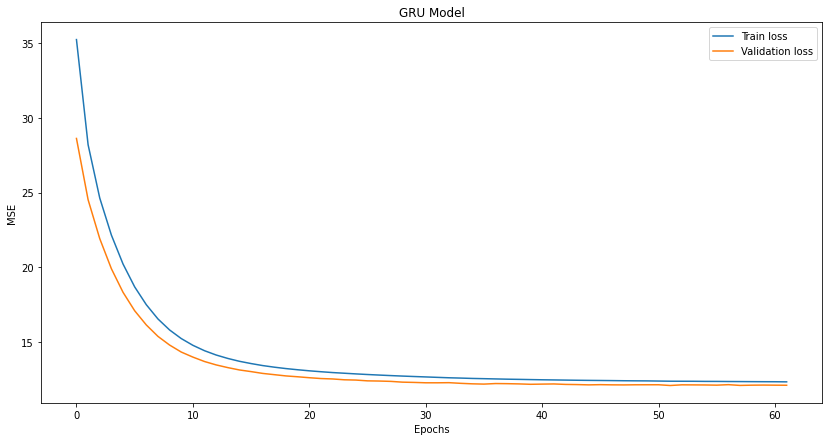

Epoch 1/1000
2626/2626 - 16s - loss: 32.9846 - accuracy: 0.7303 - val_loss: 24.2951 - val_accuracy: 0.7314 - 16s/epoch - 6ms/step
Epoch 2/1000
2626/2626 - 13s - loss: 22.4628 - accuracy: 0.7392 - val_loss: 18.9557 - val_accuracy: 0.7433 - 13s/epoch - 5ms/step
Epoch 3/1000
2626/2626 - 14s - loss: 18.5675 - accuracy: 0.7408 - val_loss: 16.4872 - val_accuracy: 0.7395 - 14s/epoch - 5ms/step
Epoch 4/1000
2626/2626 - 14s - loss: 16.5293 - accuracy: 0.7401 - val_loss: 15.0945 - val_accuracy: 0.7393 - 14s/epoch - 5ms/step
Epoch 5/1000
2626/2626 - 14s - loss: 15.3010 - accuracy: 0.7399 - val_loss: 14.2217 - val_accuracy: 0.7381 - 14s/epoch - 5ms/step
Epoch 6/1000
2626/2626 - 13s - loss: 14.5023 - accuracy: 0.7402 - val_loss: 13.6443 - val_accuracy: 0.7394 - 13s/epoch - 5ms/step
Epoch 7/1000
2626/2626 - 13s - loss: 13.9630 - accuracy: 0.7395 - val_loss: 13.2792 - val_accuracy: 0.7384 - 13s/epoch - 5ms/step
Epoch 8/1000
2626/2626 - 14s - loss: 13.5831 - accuracy: 0.7397 - val_loss: 12.9819 - val_

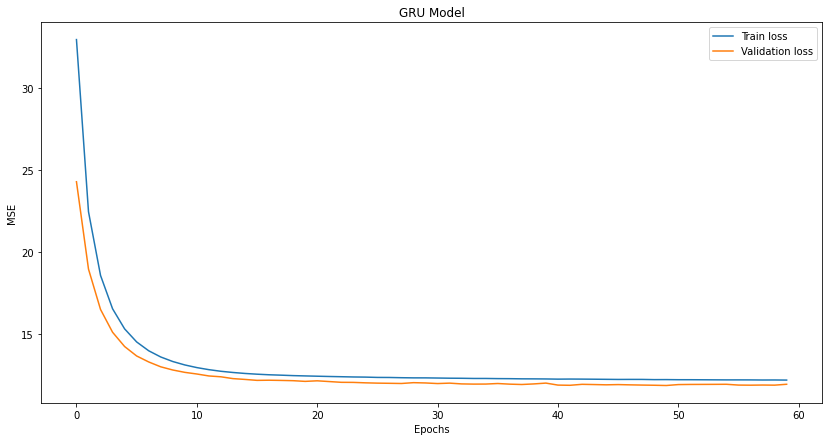

Epoch 1/1000
2626/2626 - 16s - loss: 26.1150 - accuracy: 0.7344 - val_loss: 18.0499 - val_accuracy: 0.7440 - 16s/epoch - 6ms/step
Epoch 2/1000
2626/2626 - 14s - loss: 17.1050 - accuracy: 0.7460 - val_loss: 14.9152 - val_accuracy: 0.7454 - 14s/epoch - 5ms/step
Epoch 3/1000
2626/2626 - 14s - loss: 14.7068 - accuracy: 0.7441 - val_loss: 13.5040 - val_accuracy: 0.7423 - 14s/epoch - 5ms/step
Epoch 4/1000
2626/2626 - 14s - loss: 13.6309 - accuracy: 0.7412 - val_loss: 12.9817 - val_accuracy: 0.7384 - 14s/epoch - 5ms/step
Epoch 5/1000
2626/2626 - 14s - loss: 13.1158 - accuracy: 0.7390 - val_loss: 12.6587 - val_accuracy: 0.7374 - 14s/epoch - 5ms/step
Epoch 6/1000
2626/2626 - 14s - loss: 12.8336 - accuracy: 0.7383 - val_loss: 12.4113 - val_accuracy: 0.7362 - 14s/epoch - 5ms/step
Epoch 7/1000
2626/2626 - 14s - loss: 12.6679 - accuracy: 0.7396 - val_loss: 12.2399 - val_accuracy: 0.7423 - 14s/epoch - 5ms/step
Epoch 8/1000
2626/2626 - 14s - loss: 12.5641 - accuracy: 0.7401 - val_loss: 12.2137 - val_

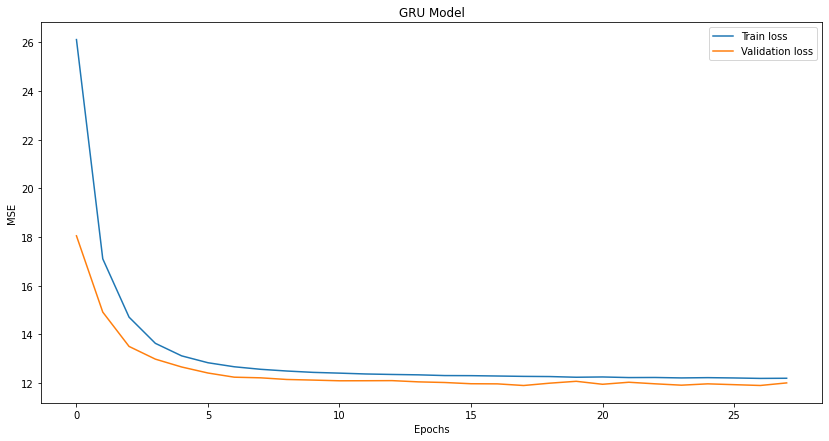

Epoch 1/1000
2626/2626 - 18s - loss: 19.9391 - accuracy: 0.7402 - val_loss: 14.5390 - val_accuracy: 0.7465 - 18s/epoch - 7ms/step
Epoch 2/1000
2626/2626 - 16s - loss: 13.9737 - accuracy: 0.7414 - val_loss: 12.8009 - val_accuracy: 0.7411 - 16s/epoch - 6ms/step
Epoch 3/1000
2626/2626 - 16s - loss: 12.9325 - accuracy: 0.7402 - val_loss: 12.4550 - val_accuracy: 0.7403 - 16s/epoch - 6ms/step
Epoch 4/1000
2626/2626 - 16s - loss: 12.6204 - accuracy: 0.7414 - val_loss: 12.1885 - val_accuracy: 0.7385 - 16s/epoch - 6ms/step
Epoch 5/1000
2626/2626 - 16s - loss: 12.4921 - accuracy: 0.7414 - val_loss: 12.1275 - val_accuracy: 0.7388 - 16s/epoch - 6ms/step
Epoch 6/1000
2626/2626 - 16s - loss: 12.4307 - accuracy: 0.7408 - val_loss: 12.0579 - val_accuracy: 0.7407 - 16s/epoch - 6ms/step
Epoch 7/1000
2626/2626 - 16s - loss: 12.3871 - accuracy: 0.7408 - val_loss: 12.0857 - val_accuracy: 0.7395 - 16s/epoch - 6ms/step
Epoch 8/1000
2626/2626 - 16s - loss: 12.3599 - accuracy: 0.7404 - val_loss: 12.0142 - val_

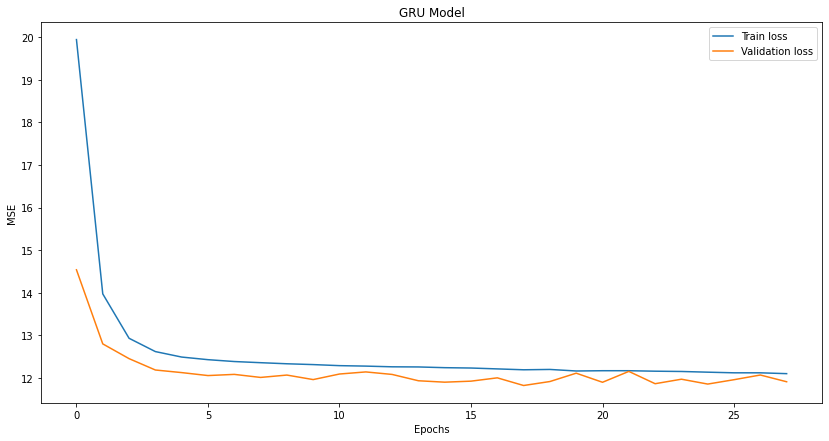

In [ ]:
auto_model(32, 8) # normal approach
auto_model(32, 16)
auto_model(32, 32)
auto_model(32, 64)

Epoch 1/1000
1313/1313 - 9s - loss: 32.2711 - accuracy: 0.7380 - val_loss: 28.2358 - val_accuracy: 0.7218 - 9s/epoch - 7ms/step
Epoch 2/1000
1313/1313 - 7s - loss: 28.6985 - accuracy: 0.7229 - val_loss: 25.4573 - val_accuracy: 0.7264 - 7s/epoch - 5ms/step
Epoch 3/1000
1313/1313 - 7s - loss: 26.0318 - accuracy: 0.7291 - val_loss: 23.5866 - val_accuracy: 0.7332 - 7s/epoch - 5ms/step
Epoch 4/1000
1313/1313 - 7s - loss: 24.3278 - accuracy: 0.7338 - val_loss: 22.1810 - val_accuracy: 0.7370 - 7s/epoch - 5ms/step
Epoch 5/1000
1313/1313 - 7s - loss: 22.8981 - accuracy: 0.7360 - val_loss: 20.9507 - val_accuracy: 0.7381 - 7s/epoch - 5ms/step
Epoch 6/1000
1313/1313 - 7s - loss: 21.6306 - accuracy: 0.7384 - val_loss: 19.8532 - val_accuracy: 0.7401 - 7s/epoch - 5ms/step
Epoch 7/1000
1313/1313 - 7s - loss: 20.5034 - accuracy: 0.7406 - val_loss: 18.8810 - val_accuracy: 0.7410 - 7s/epoch - 5ms/step
Epoch 8/1000
1313/1313 - 7s - loss: 19.5091 - accuracy: 0.7422 - val_loss: 18.0269 - val_accuracy: 0.743

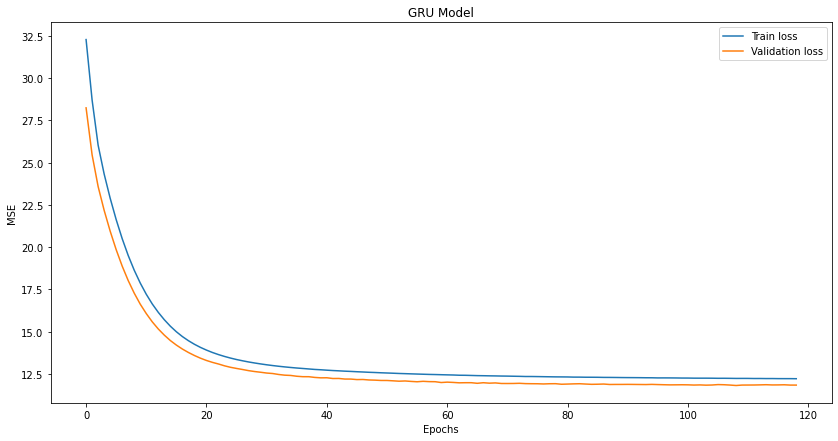

Epoch 1/1000
1313/1313 - 9s - loss: 31.7779 - accuracy: 0.7296 - val_loss: 25.0308 - val_accuracy: 0.7201 - 9s/epoch - 7ms/step
Epoch 2/1000
1313/1313 - 7s - loss: 24.5588 - accuracy: 0.7335 - val_loss: 21.5123 - val_accuracy: 0.7426 - 7s/epoch - 5ms/step
Epoch 3/1000
1313/1313 - 7s - loss: 21.5561 - accuracy: 0.7437 - val_loss: 19.1999 - val_accuracy: 0.7449 - 7s/epoch - 5ms/step
Epoch 4/1000
1313/1313 - 7s - loss: 19.4393 - accuracy: 0.7444 - val_loss: 17.6125 - val_accuracy: 0.7450 - 7s/epoch - 5ms/step
Epoch 5/1000
1313/1313 - 7s - loss: 17.8912 - accuracy: 0.7450 - val_loss: 16.3707 - val_accuracy: 0.7468 - 7s/epoch - 5ms/step
Epoch 6/1000
1313/1313 - 7s - loss: 16.7266 - accuracy: 0.7451 - val_loss: 15.4708 - val_accuracy: 0.7449 - 7s/epoch - 5ms/step
Epoch 7/1000
1313/1313 - 7s - loss: 15.8252 - accuracy: 0.7442 - val_loss: 14.7579 - val_accuracy: 0.7442 - 7s/epoch - 5ms/step
Epoch 8/1000
1313/1313 - 7s - loss: 15.1304 - accuracy: 0.7438 - val_loss: 14.2242 - val_accuracy: 0.742

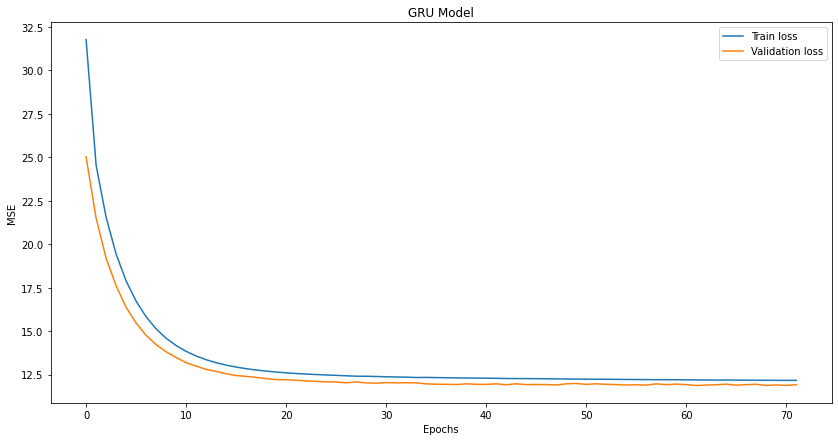

Epoch 1/1000
1313/1313 - 10s - loss: 30.0692 - accuracy: 0.7286 - val_loss: 21.0367 - val_accuracy: 0.7388 - 10s/epoch - 7ms/step
Epoch 2/1000
1313/1313 - 8s - loss: 19.8091 - accuracy: 0.7428 - val_loss: 17.1314 - val_accuracy: 0.7452 - 8s/epoch - 6ms/step
Epoch 3/1000
1313/1313 - 8s - loss: 16.9260 - accuracy: 0.7444 - val_loss: 15.2371 - val_accuracy: 0.7454 - 8s/epoch - 6ms/step
Epoch 4/1000
1313/1313 - 8s - loss: 15.2488 - accuracy: 0.7427 - val_loss: 14.0733 - val_accuracy: 0.7418 - 8s/epoch - 6ms/step
Epoch 5/1000
1313/1313 - 8s - loss: 14.2603 - accuracy: 0.7415 - val_loss: 13.4242 - val_accuracy: 0.7395 - 8s/epoch - 6ms/step
Epoch 6/1000
1313/1313 - 8s - loss: 13.6736 - accuracy: 0.7408 - val_loss: 13.0148 - val_accuracy: 0.7419 - 8s/epoch - 6ms/step
Epoch 7/1000
1313/1313 - 8s - loss: 13.2944 - accuracy: 0.7403 - val_loss: 12.7570 - val_accuracy: 0.7421 - 8s/epoch - 6ms/step
Epoch 8/1000
1313/1313 - 8s - loss: 13.0305 - accuracy: 0.7410 - val_loss: 12.5863 - val_accuracy: 0.7

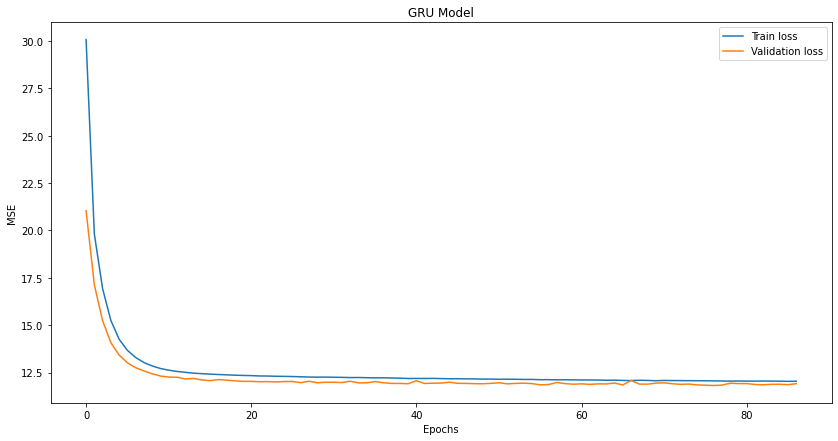

Epoch 1/1000
1313/1313 - 11s - loss: 21.6974 - accuracy: 0.7381 - val_loss: 15.8634 - val_accuracy: 0.7452 - 11s/epoch - 9ms/step
Epoch 2/1000
1313/1313 - 9s - loss: 15.2908 - accuracy: 0.7429 - val_loss: 13.7011 - val_accuracy: 0.7348 - 9s/epoch - 7ms/step
Epoch 3/1000
1313/1313 - 9s - loss: 13.6540 - accuracy: 0.7386 - val_loss: 12.7383 - val_accuracy: 0.7402 - 9s/epoch - 7ms/step
Epoch 4/1000
1313/1313 - 9s - loss: 13.0034 - accuracy: 0.7379 - val_loss: 12.4438 - val_accuracy: 0.7371 - 9s/epoch - 7ms/step
Epoch 5/1000
1313/1313 - 9s - loss: 12.7093 - accuracy: 0.7397 - val_loss: 12.2251 - val_accuracy: 0.7384 - 9s/epoch - 7ms/step
Epoch 6/1000
1313/1313 - 9s - loss: 12.5558 - accuracy: 0.7409 - val_loss: 12.1961 - val_accuracy: 0.7378 - 9s/epoch - 7ms/step
Epoch 7/1000
1313/1313 - 9s - loss: 12.4611 - accuracy: 0.7405 - val_loss: 12.1263 - val_accuracy: 0.7431 - 9s/epoch - 7ms/step
Epoch 8/1000
1313/1313 - 9s - loss: 12.4067 - accuracy: 0.7419 - val_loss: 12.0118 - val_accuracy: 0.7

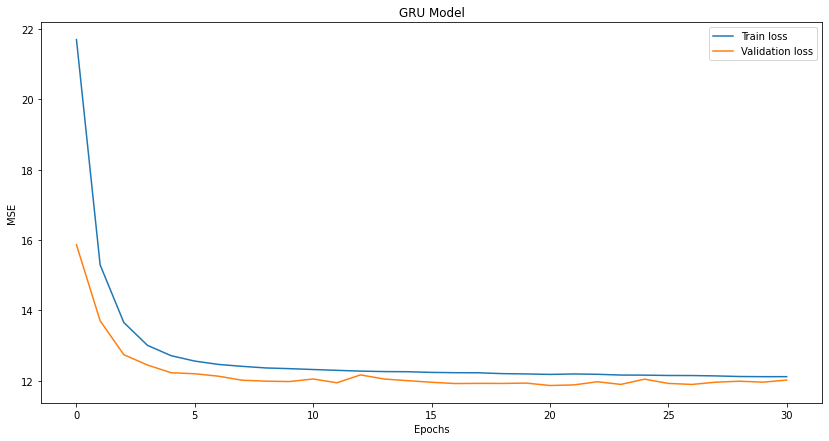

In [ ]:
auto_model(64, 8) # normal approach
auto_model(64, 16)
auto_model(64, 32)
auto_model(64, 64)

In [ ]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1
epochs = 1000
lr = 0.0001

# initial
# batch = 128
# gru_model = Sequential()
# gru_model.add(L.GRU(10, input_shape=(serie_size, n_features), return_sequences=True))
# gru_model.add(L.GRU(6, activation='relu', return_sequences=True))
# gru_model.add(L.GRU(1, activation='relu'))
# gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
# gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
# gru_model.add(L.Dense(1))

# batch = 8
# gru_model = Sequential()
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.388041668948158
# Validation rmse: 3.4583950705976156
# batch = 32
# gru_model = Sequential()
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.451410642125703
# Validation rmse: 3.4463293985015766
# batch = 64
# gru_model = Sequential()
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.428789605348786
# Validation rmse: 3.4456642231827086
# batch = 128
# gru_model = Sequential()
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.428789605348786
# Validation rmse: 3.4456642231827086

# batch = 8
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4689217869830657
# Validation rmse: 3.438060491332749
# batch = 32
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4941325485985057
# Validation rmse: 3.472748926521854
# batch = 64
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4839408102783755
# Validation rmse: 3.448547567489309
# batch = 128
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4725907874227357
# Validation rmse: 3.4441994524373976

# batch = 8
# gru_model = Sequential()
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.454976634415816
# Validation rmse: 3.443328396407805
# batch = 32
# gru_model = Sequential()
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4732362919100774
# Validation rmse: 3.4514399351232514
# batch = 64
# gru_model = Sequential()
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.466545825995071
# Validation rmse: 3.439094351125235
# batch = 128
# gru_model = Sequential()
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4599279053634433
# Validation rmse: 3.4561099308382683

# STEP 1
# batch = 64
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4980962567114755
# Validation rmse: 3.499531103958127
# Train mse: 12.2476
# Validation mse: 12.2467 
# epoch: 179
# gru_model = Sequential()
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4785232537934676
# Validation rmse: 3.4861357959975923
# Train mse: 12.1204
# Validation mse: 12.1531
# epoch: 103
# gru_model = Sequential()
# gru_model.add(L.GRU(32, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.495561316952985
# Validation rmse: 3.5011064105933922
# Train mse: 12.2508
# Validation mse: 12.2577
# epoch: 42
# gru_model = Sequential()
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features)))
# gru_model.add(L.Dense(1, activation='linear'))
# Train rmse: 3.4874676817742456
# Validation rmse: 3.499523590458947
# Train mse: 12.2048
# Validation mse: 12.2467
# epoch: 27

# STEP 2
# batch = 8
# Train rmse: 3.47037074238946
# Validation rmse: 3.494153690896435
# Train mse: 12.0821
# Validation mse: 12.2091
# epoch: 47
# batch = 64
# Train rmse: 3.493603968983676
# Validation rmse: 3.5078531683046306
# Train mse: 12.2232
# Validation mse: 12.3050
# epoch: 91
# batch = 32 SUDAH
# Train rmse: 3.490190644829008
# Validation rmse: 3.500842045129869
# Train mse: 12.2023
# Validation mse: 12.2559
# epoch: 60
# batch = 128
# Train rmse: 3.5015344590830217
# Validation rmse: 3.502360982049173
# Train mse: 12.2724
# Validation mse: 12.2665
# epoch: 122

# batch = 8
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features))) # mse-train:11.8292 | val:10.7348 || rmse-train:3.4369 | val:3.2763 || epoch:52
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features))) # mse-train:11.8115 | val:10.7237 || rmse-train:3.4449 | val:3.2747 || epoch:33
# gru_model.add(L.GRU(32, input_shape=(serie_size, n_features))) # mse-train:11.7450 | val:10.7956 || rmse-train:3.4244 | val:3.2856 || epoch:24
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features))) # mse-train:11.7064 | val:10.8164 || rmse-train:3.4093 | val:3.2888 || epoch:22
# gru_model.add(L.GRU(128, input_shape=(serie_size, n_features))) # mse-train:11.6896 | val:10.8857 || rmse-train:3.4002 | val:3.2993 || epoch:16
# gru_model.add(L.Dense(1, activation='linear'))

# batch = 16
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features))) # mse-train:11.8234 | val:10.7590 || rmse-train:3.4371 | val:3.2800 || epoch:77
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features))) # mse-train:11.8628 | val:10.7730 || rmse-train:3.4397 | val:3.2822 || epoch:31
# gru_model.add(L.GRU(32, input_shape=(serie_size, n_features))) # mse-train:11.7856 | val:10.8371 || rmse-train:3.4311 | val:3.2919 || epoch:27
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features))) # mse-train:11.6427 | val:10.8164 || rmse-train:3.4107 | val:3.2999 || epoch:31
# gru_model.add(L.Dense(1, activation='linear'))

# batch = 32
# gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features))) # mse-train:11.8599 | val:10.9300 || rmse-train:3.4537 | val:3.3060 || epoch:90
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features))) # mse-train:11.7954 | val:10.7089 || rmse-train:3.4320 | val:3.2724 || epoch:65
# gru_model.add(L.GRU(32, input_shape=(serie_size, n_features))) # mse-train:11.7591 | val:10.7304 || rmse-train:3.4259 | val:3.2757 || epoch:36
# gru_model.add(L.GRU(64, input_shape=(serie_size, n_features))) # mse-train:11.6868 | val:10.7955 || rmse-train:3.4109 | val:3.2856 || epoch:31
# gru_model.add(L.Dense(1, activation='linear'))

batch = 64
gru_model = Sequential()
# gru_model.add(L.GRU(8, input_shape=(serie_size, n_features))) # mse-train:11.8609 | val:10.7526 || rmse-train:3.4418 | val:3.2791 || epoch:117
# gru_model.add(L.GRU(16, input_shape=(serie_size, n_features))) # mse-train:11.8058 | val:10.8027 || rmse-train:3.4342 | val:3.2867 || epoch:72
# gru_model.add(L.GRU(32, input_shape=(serie_size, n_features))) # mse-train:11.8170 | val:10.7304 || rmse-train:3.4348 | val:10.7270 || epoch:39
gru_model.add(L.GRU(64, input_shape=(serie_size, n_features))) # mse-train:11.7310 | val:10.6916 || rmse-train:3.4201 | val:3.2697 || epoch:33
gru_model.add(L.Dense(1, activation='linear'))




gru_model.summary()
adam = optimizers.Adam(lr)
gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = callbacks.EarlyStopping(patience = 10)
gru_history = gru_model.fit(X_train, Y_train, 
                              validation_data=(X_valid, Y_valid), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2,
                              callbacks=[early_stop])

Epoch 1/1000
1313/1313 - 16s - loss: 22.9393 - accuracy: 0.7348 - val_loss: 16.3140 - val_accuracy: 0.7442 - 16s/epoch - 13ms/step
Epoch 2/1000
1313/1313 - 14s - loss: 15.6628 - accuracy: 0.7432 - val_loss: 13.9749 - val_accuracy: 0.7395 - 14s/epoch - 11ms/step
Epoch 3/1000
1313/1313 - 13s - loss: 13.8419 - accuracy: 0.7410 - val_loss: 12.8743 - val_accuracy: 0.7411 - 13s/epoch - 10ms/step
Epoch 4/1000
1313/1313 - 13s - loss: 13.0722 - accuracy: 0.7387 - val_loss: 12.4559 - val_accuracy: 0.7410 - 13s/epoch - 10ms/step
Epoch 5/1000
1313/1313 - 13s - loss: 12.7511 - accuracy: 0.7392 - val_loss: 12.2442 - val_accuracy: 0.7412 - 13s/epoch - 10ms/step
Epoch 6/1000
1313/1313 - 13s - loss: 12.5849 - accuracy: 0.7400 - val_loss: 12.1837 - val_accuracy: 0.7403 - 13s/epoch - 10ms/step
Epoch 7/1000
1313/1313 - 13s - loss: 12.4907 - accuracy: 0.7407 - val_loss: 12.0950 - val_accuracy: 0.7422 - 13s/epoch - 10ms/step
Epoch 8/1000
1313/1313 - 12s - loss: 12.4291 - accuracy: 0.7408 - val_loss: 12.1364

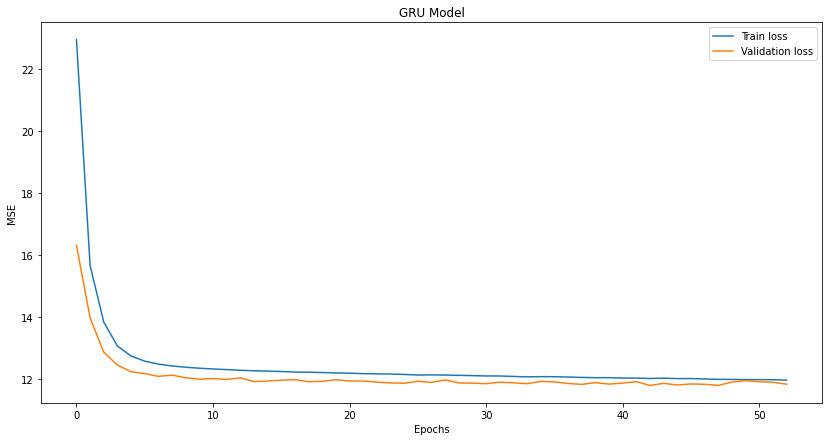

In [ ]:
fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))

ax1.plot(gru_history.history['loss'], label='Train loss')
ax1.plot(gru_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('GRU Model')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

plt.show()

In [ ]:
lstm_train_pred = gru_model.predict(X_train)
lstm_val_pred = gru_model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

# initial rmse
# Train rmse: 3.7879875832980106
# Validation rmse: 3.5863885559863915

# Train rmse: 3.482833369441834
# Validation rmse: 3.6676193108794073

# Train rmse: 3.4843642415099056 (hapus tanda > pada bagian transfromasi data)
# Validation rmse: 3.457348787205318

Train rmse: 3.4548417118082235
Validation rmse: 3.441376951482262


In [ ]:
# save model to single file

# gru_model.save('gru_model.h5')

In [ ]:
# plt.figure(figsize=(20,6))
# plt.plot(X_train, "b-", label="Train")
# plt.plot(Y_train, "r-", label="Test")
# plt.plot(lstm_train_pred, "g--", label="Pred")
# plt.show()

# Test - web fix

In [41]:
# data preprocessing for prediction january 2022

testing = df2021.copy()

testing['month_year'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_year'] = testing['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11})
# testing['month_year'] = testing['month_year'].map({'01-21':'Januari','02-21':'Februari','03-21':'Maret','04-21':'April','05-21':'Mei','06-21':'Juni','07-21':'Juli','08-21':'Agustus','09-21':'September','10-21':"Oktober",'11-21':'November','12-21':'Desember'})

test_monthly = testing[['tgl', 'month_year', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_year', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [42]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head())

month_year,barcode,0,1,2,3,4,5,6,7,8,9,10,11
0,00100809,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00113731,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32
2,00129213,38.39,0.00,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00133173,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.26,0.00,0.00,0.00,0.00
4,00133210,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [43]:
# data preprocessing for prediction february 2022

testing_pred = df2022.copy()

testing_pred = testing_pred.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

testing_pred['month_year'] = testing_pred['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing_pred['month_year'] = testing_pred['month_year'].map({'01-22':0,'02-22':1})

testing_monthly_pred = testing_pred[['tgl', 'month_year', 'barcode', 'qty']]
testing_monthly_pred = testing_monthly_pred.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
testing_monthly_pred = testing_monthly_pred.agg({'qty':['sum']})
testing_monthly_pred.columns = ['month_year', 'barcode', 'qty_cnt']
testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
testing_monthly_pred['qty_cnt_month'] = testing_monthly_pred.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

testing_monthly_series_pred = testing_monthly_pred.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [44]:
print(f"Min date from data set: {testing_pred['tgl'].min().date()}")
print(f"Max date from data set: {testing_pred['tgl'].max().date()}")
print("Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1")

Min date from data set: 2022-01-01
Max date from data set: 2022-03-01
Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1


In [45]:
testing_monthly_series_pred.head()

month_year,barcode,0.0,1.0
0,00100809,5.67,2.89
1,00113731,0.87,0.00
2,00133241,20.52,36.09
3,00149457,6.05,7.65
4,00149815,8.21,12.49


In [46]:
pred_list = ['96770', '011747234207', '96842', '97162', '8992933211115', '8999999195670', '00100809', '9557062331128', '97515', '00149457']
df_pred_list = df[df['barcode'].isin(pred_list)].reset_index(drop=True)

In [47]:
df_pred_grouped = df_pred_list.groupby(["barcode", "namabarang"]).size().reset_index().rename(columns={0:'count'})
product_list = df_pred_grouped['barcode'].to_list()
namabarang = df_pred_grouped['namabarang'].to_list()

In [48]:
# get data selected product list from 2021 and 2022 for ploting on website

# product_list = ['011747233057', '011747234207', '055500130221']
# namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

selected_data_2021 = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2021['namabarang'] = namabarang
selected_data_2022['namabarang'] = namabarang
selected_data_2021 = selected_data_2021[['barcode', 'namabarang', 0, 1, 2, 3,  4, 5, 6, 7, 8, 9, 10, 11]]
selected_data_2022 = selected_data_2022[['barcode', 'namabarang', 0, 1]]
selected_data_2021.rename(columns = {0:'Januari', 1:'Februari', 2:'Maret', 3:'April', 4:'Mei', 5:'Juni', 6:'Juli', 7:'Agustus', 8:'September', 9:'Oktober', 10:'November', 11:'Desember'}, inplace = True)
selected_data_2022.rename(columns = {0:'Januari', 1:'Februari'}, inplace = True)
# selected_data_2022.drop(['barcode', 'kodejenis'], axis=1, inplace=True)
# appenned_data = df.append()
# # df_train_raw.to_csv('df_train_raw_new.csv', index=False)
display(selected_data_2021)
display(selected_data_2022)
# display(appenned_data)

month_year,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,00100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00149457,MELON PUTIH/KG,14.10,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14
2,011747234207,DOLPIN GARAM 1000GR*12,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,16.00,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,26.00,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,23.00,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00
6,96770,GELAS CJ-255,9.00,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00
7,96842,SISIR GARPU HITAM,0.00,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
8,97162,GELAS POLOS HS-9N,6.00,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00
9,97515,"MASKING TAPE 2"" TBL BERRY",3.00,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00


month_year,barcode,namabarang,Januari,Februari
0,00100809,KACANG HIJAU / KG,5.67,2.89
1,00149457,MELON PUTIH/KG,6.05,7.65
2,011747234207,DOLPIN GARAM 1000GR*12,12.00,8.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,9.00,8.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,37.00,38.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,17.00,10.00
6,96770,GELAS CJ-255,8.00,0.00
7,96842,SISIR GARPU HITAM,5.00,4.00
8,97162,GELAS POLOS HS-9N,16.00,4.00
9,97515,"MASKING TAPE 2"" TBL BERRY",8.00,4.00


In [49]:
# selected_data_2021.to_csv('riwayat_pred_jan.csv', index=False)
# selected_data_2021.drop(['Januari'], axis=1, inplace=True)
# selected_data_2021['Januari'] = selected_data_2022['Januari']
# selected_data_2021.to_csv('riwayat_pred_feb.csv', index=False)

In [50]:
selected_data_2021

month_year,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,00100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00149457,MELON PUTIH/KG,14.10,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14
2,011747234207,DOLPIN GARAM 1000GR*12,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,16.00,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,26.00,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,23.00,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00
6,96770,GELAS CJ-255,9.00,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00
7,96842,SISIR GARPU HITAM,0.00,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
8,97162,GELAS POLOS HS-9N,6.00,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00
9,97515,"MASKING TAPE 2"" TBL BERRY",3.00,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00


In [51]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True) # 2021 data
# df_pred_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True) # 2022 data
# df_pred = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# df_pred.fillna(0, inplace=True)
# df_pred.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [52]:
# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_jan = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_jan.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_jan.drop([0], axis=1, inplace=True)
# df_pred_jan.head()
# df_pred_jan.to_csv('df_pred_jan.csv', index=False)

In [53]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_feb = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_feb.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_feb
# df_pred_feb[0]
# df_pred_jan[12] = df_pred_feb[0]
# df_pred_jan
# df_pred_jan.to_csv('df_pred_feb.csv', index=False)

In [54]:
# df_pred.to_csv('df_pred.csv', index=False)

In [55]:
jan = pd.read_csv('./riwayat_pred_jan.csv')
feb = pd.read_csv('./riwayat_pred_feb.csv')

In [56]:
# drop unnecessary column

X_jan = jan.drop_duplicates(subset=['barcode'])
X_jan.fillna(0, inplace=True)
X_jan.drop(['barcode', 'namabarang'], axis=1, inplace=True)

X_feb = feb.drop_duplicates(subset=['barcode'])
X_feb.fillna(0, inplace=True)
X_feb.drop(['barcode', 'namabarang'], axis=1, inplace=True)

In [57]:
display(X_jan)
display(X_feb)

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,14.10,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14
2,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
3,16.00,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00
4,26.00,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00
5,23.00,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00
6,9.00,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00
7,0.00,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
8,6.00,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00
9,3.00,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00


,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari
0,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67
1,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14,6.05
2,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
3,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00,9.00
4,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00,37.00
5,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00,17.00
6,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00,8.00
7,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00,5.00
8,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00,16.00
9,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00,8.00


In [58]:
# reshape the predict dataset

X_reshaped_jan = X_jan.values.reshape((X_jan.shape[0], X_jan.shape[1], 1))
display(X_reshaped_jan.shape)

X_reshaped_feb = X_feb.values.reshape((X_feb.shape[0], X_feb.shape[1], 1))
display(X_reshaped_feb.shape)

(10, 12, 1)

(10, 12, 1)

In [79]:
gru_model = load_model('gru_model-bs32_hn16_month46.h5')

In [80]:
# predict the dataset

model_pred_jan = gru_model.predict(X_reshaped_jan)
model_pred_feb = gru_model.predict(X_reshaped_feb)

In [81]:
model_pred_feb

array([[ 4.088707 ],
       [ 7.841992 ],
       [14.972679 ],
       [11.656221 ],
       [24.22312  ],
       [16.758982 ],
       [ 5.6149664],
       [ 2.3387926],
       [10.206085 ],
       [ 5.097205 ]], dtype=float32)

In [82]:
# get back the barcode to pairing the prediction

barcode_pred_jan = jan[['barcode', 'namabarang']]
barcode_pred_feb = feb[['barcode', 'namabarang']]

prediction_jan = pd.DataFrame(barcode_pred_jan[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_jan['prediction_january'] = pd.DataFrame(model_pred_jan)
display(prediction_jan)

prediction_feb = pd.DataFrame(barcode_pred_feb[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_feb['prediction_february'] = pd.DataFrame(model_pred_feb)
display(prediction_feb)

# pred.to_csv('gru_submission.csv', index=False)

,barcode,namabarang,prediction_january
0,100809,KACANG HIJAU / KG,3.68
1,149457,MELON PUTIH/KG,9.08
2,11747234207,DOLPIN GARAM 1000GR*12,18.06
3,8992933211115,NUTRIJELL STRAWBERRY 12,12.31
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,20.88
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,17.62
6,96770,GELAS CJ-255,3.99
7,96842,SISIR GARPU HITAM,0.61
8,97162,GELAS POLOS HS-9N,6.17
9,97515,"MASKING TAPE 2"" TBL BERRY",3.82


,barcode,namabarang,prediction_february
0,100809,KACANG HIJAU / KG,4.09
1,149457,MELON PUTIH/KG,7.84
2,11747234207,DOLPIN GARAM 1000GR*12,14.97
3,8992933211115,NUTRIJELL STRAWBERRY 12,11.66
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,24.22
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,16.76
6,96770,GELAS CJ-255,5.61
7,96842,SISIR GARPU HITAM,2.34
8,97162,GELAS POLOS HS-9N,10.21
9,97515,"MASKING TAPE 2"" TBL BERRY",5.10


In [83]:
selected_data_2022

month_year,barcode,namabarang,Januari,Februari
0,00100809,KACANG HIJAU / KG,5.67,2.89
1,00149457,MELON PUTIH/KG,6.05,7.65
2,011747234207,DOLPIN GARAM 1000GR*12,12.00,8.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,9.00,8.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,37.00,38.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,17.00,10.00
6,96770,GELAS CJ-255,8.00,0.00
7,96842,SISIR GARPU HITAM,5.00,4.00
8,97162,GELAS POLOS HS-9N,16.00,4.00
9,97515,"MASKING TAPE 2"" TBL BERRY",8.00,4.00


In [88]:
pred_jan = prediction_jan["prediction_january"]
pred_feb = prediction_feb["prediction_february"]

In [91]:
actual_jan = selected_data_2022['Januari']
actual_feb = selected_data_2022['Februari']

In [92]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

47.13140112031133

In [97]:
# lstm_train_pred = gru_model.predict(X_train)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))

print('Prediction rmse:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse: 6.858419463917299
Prediction rmse: 6.106897321026563


In [68]:
# test.to_csv('test_result.csv', index=False)

In [69]:
# # save the model to disk
# filename = 'gru_model.sav'
# joblib.dump(gru_model, filename)
 
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.predict(X_test, Y_test)
# print(result)

# Test - web

In [ ]:
# data preprocessing for prediction january 2022

testing = df2021.copy()

testing['month_year'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_year'] = testing['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11})

test_monthly = testing[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head())

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11
0,00100809,01011601,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00113731,02020101,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32
2,00129213,02010113,38.39,0.00,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00133173,02010137,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.26,0.00,0.00,0.00,0.00
4,00133210,02010113,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# data preprocessing for prediction february 2022

testing_pred = df2022.copy()

testing_pred = testing_pred.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

testing_pred['month_year'] = testing_pred['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing_pred['month_year'] = testing_pred['month_year'].map({'01-22':0,'02-22':1,'03-22':2})

testing_monthly_pred = testing_pred[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']]
testing_monthly_pred = testing_monthly_pred.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
testing_monthly_pred = testing_monthly_pred.agg({'qty':['sum']})
testing_monthly_pred.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
testing_monthly_pred['qty_cnt_month'] = testing_monthly_pred.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

testing_monthly_series_pred = testing_monthly_pred.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
print(f"Min date from data set: {testing_pred['tgl'].min().date()}")
print(f"Max date from data set: {testing_pred['tgl'].max().date()}")
print("Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1")

Min date from data set: 2022-01-01
Max date from data set: 2022-03-01
Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1


In [ ]:
testing_monthly_series_pred.head()

month_yr,barcode,kodejenis,0,1,2
0,00100809,01011601,5.67,2.89,0.30
1,00113731,02020101,0.87,0.00,0.00
2,00133173,02010137,0.00,0.00,16.02
3,00133227,02010113,0.00,0.00,6.58
4,00133241,02010102,20.52,36.09,1.53


In [ ]:
# get data selected product list from 2021 and 2022 for ploting on website

product_list = ['011747233057', '011747234207', '055500130221']
namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

selected_data_2021 = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2021['namabarang'] = namabarang
selected_data_2022['namabarang'] = namabarang
# selected_data_2022.drop(['barcode', 'kodejenis'], axis=1, inplace=True)
# appenned_data = df.append()
# # df_train_raw.to_csv('df_train_raw_new.csv', index=False)
display(selected_data_2021)
display(selected_data_2022)
# display(appenned_data)

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,namabarang
0,011747233057,01011403,2.00,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,DUA KELINCI KCG.GRG 10*750GR
1,011747234207,01011101,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,DOLPIN GARAM 1000GR*12
2,055500130221,03040302,10.00,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,SOS P.LANTAI ORANGE 750ML REFF


month_yr,barcode,kodejenis,0,1,2,namabarang
0,011747233057,01011403,0.00,3.00,0.00,DUA KELINCI KCG.GRG 10*750GR
1,011747234207,01011101,12.00,8.00,2.00,DOLPIN GARAM 1000GR*12
2,055500130221,03040302,11.00,18.00,0.00,SOS P.LANTAI ORANGE 750ML REFF


In [ ]:
selected_data_2022[0]

0    0.00
1   12.00
2   11.00
Name: 0, dtype: float64

In [ ]:
selected_data_2021.to_csv('df_train_jan_new.csv', index=False)
selected_data_2021.drop([0], axis=1, inplace=True)
selected_data_2021[12] = selected_data_2022[0]
selected_data_2021.to_csv('df_train_feb_new.csv', index=False)

In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True) # 2021 data
# df_pred_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True) # 2022 data
# df_pred = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# df_pred.fillna(0, inplace=True)
# df_pred.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_jan = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_jan.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_jan.drop([0], axis=1, inplace=True)
# df_pred_jan.head()
# df_pred_jan.to_csv('df_pred_jan.csv', index=False)

In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_feb = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_feb.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_feb
# df_pred_feb[0]
# df_pred_jan[12] = df_pred_feb[0]
# df_pred_jan
# df_pred_jan.to_csv('df_pred_feb.csv', index=False)

In [ ]:
# df_pred.to_csv('df_pred.csv', index=False)

In [ ]:
jan = pd.read_csv('./df_train_jan_new.csv')
feb = pd.read_csv('./df_train_feb_new.csv')

In [ ]:
# drop unnecessary column

X_jan = jan.drop_duplicates(subset=['barcode'])
X_jan.fillna(0, inplace=True)
X_jan.drop(['barcode', 'kodejenis', 'namabarang'], axis=1, inplace=True)

X_feb = feb.drop_duplicates(subset=['barcode'])
X_feb.fillna(0, inplace=True)
X_feb.drop(['barcode', 'kodejenis', 'namabarang'], axis=1, inplace=True)

In [ ]:
display(X_jan)
display(X_feb)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.00,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00
1,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
2,10.00,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00


,1,2,3,4,5,6,7,8,9,10,11,12
0,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00
1,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
2,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00


In [ ]:
# reshape the predict dataset

X_reshaped_jan = X_jan.values.reshape((X_jan.shape[0], X_jan.shape[1], 1))
display(X_reshaped_jan.shape)

X_reshaped_feb = X_feb.values.reshape((X_feb.shape[0], X_feb.shape[1], 1))
display(X_reshaped_feb.shape)

(3, 12, 1)

(3, 12, 1)

In [ ]:
# predict the dataset

model_pred_jan = gru_model.predict(X_reshaped_jan)
model_pred_feb = gru_model.predict(X_reshaped_feb)

In [ ]:
# get back the barcode to pairing the prediction

barcode_pred_jan = jan[['barcode', 'namabarang']]
barcode_pred_feb = feb[['barcode', 'namabarang']]

prediction_jan = pd.DataFrame(barcode_pred_jan[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_jan['prediction_january'] = pd.DataFrame(model_pred_jan)
display(prediction_jan.head())

prediction_feb = pd.DataFrame(barcode_pred_feb[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_feb['prediction_february'] = pd.DataFrame(model_pred_feb)
display(prediction_feb.head())

# pred.to_csv('gru_submission.csv', index=False)

,barcode,namabarang,prediction_january
0,11747233057,DUA KELINCI KCG.GRG 10*750GR,3.19
1,11747234207,DOLPIN GARAM 1000GR*12,18.04
2,55500130221,SOS P.LANTAI ORANGE 750ML REFF,7.75


,barcode,namabarang,prediction_february
0,11747233057,DUA KELINCI KCG.GRG 10*750GR,2.25
1,11747234207,DOLPIN GARAM 1000GR*12,14.56
2,55500130221,SOS P.LANTAI ORANGE 750ML REFF,9.43


In [ ]:
selected_data_2022

month_yr,barcode,kodejenis,0,1,2
0,011747233057,01011403,0.00,3.00,0.00
1,011747234207,01011101,12.00,8.00,2.00
2,055500130221,03040302,11.00,18.00,0.00


In [ ]:
pred = prediction_jan["prediction_january"]
# pred = prediction_feb["prediction_february"]

In [ ]:
actual = selected_data_2022[0]
# actual = selected_data_2022[1]

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual, pred)

52.249328736905696

In [ ]:
# lstm_train_pred = gru_model.predict(X_train)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))

print('Prediction rmse:', np.sqrt(mean_squared_error(actual, pred)))

Prediction rmse: 4.381270132209302


In [ ]:
# test.to_csv('test_result.csv', index=False)

In [ ]:
# # save the model to disk
# filename = 'gru_model.sav'
# joblib.dump(gru_model, filename)
 
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.predict(X_test, Y_test)
# print(result)

#EDA

In [ ]:
df.head()

,tgl,satuan,qty,hargajual,barcode,kodejenis,kodekategori,kategori,month_yr
0,2017-10-08 10:21:56.667,PCS,2.00,3850.00,8992946511790,10301,103.00,Healt & Beauty Care (3),9
1,2017-09-18 20:38:05.290,PCS,1.00,7250.00,8993053211672,10507,105.00,Cleaning (5),8
2,2017-02-03 19:58:25.060,PCS,1.00,17300.00,8999999056872,10302,103.00,Healt & Beauty Care (3),1
3,2017-05-27 15:44:34.500,PCS,2.00,2100.00,089686910384,20113,201.00,Food (1),4
4,2017-12-03 17:01:00.420,PCS,1.00,0.00,56103,10601,106.00,Homes (6),11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11533836 entries, 0 to 11533835
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   hargajual     float64       
 4   barcode       object        
 5   kodejenis     object        
 6   kodekategori  float64       
 7   kategori      object        
 8   month_yr      int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 792.0+ MB


In [ ]:
barcode_u = len(pd.unique(df['barcode']))
jenis_u = len(pd.unique(df['kodejenis']))
kategori_u = len(pd.unique(df['kodekategori']))
print('Unique Barcode:',barcode_u)
print('Unique Kode Jenis:',jenis_u)
print('Unique Kode Kategori:',kategori_u)

Unique Barcode: 30517
Unique Kode Jenis: 509
Unique Kode Kategori: 106


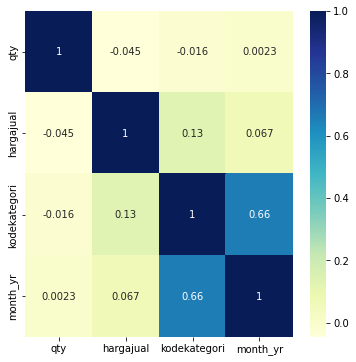

In [ ]:
corr = df.corr()
top_corr_features = corr.index[abs(corr["qty"])>0]

plt.figure(figsize=(6,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

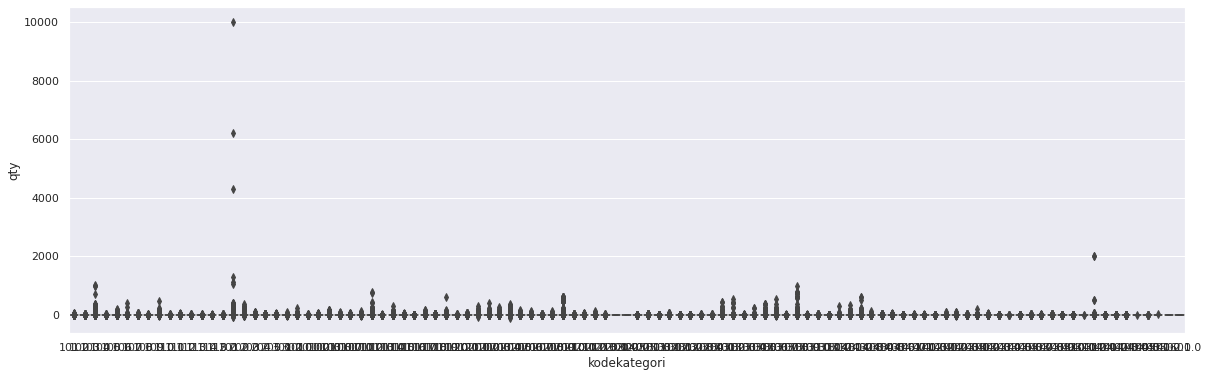

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=df)

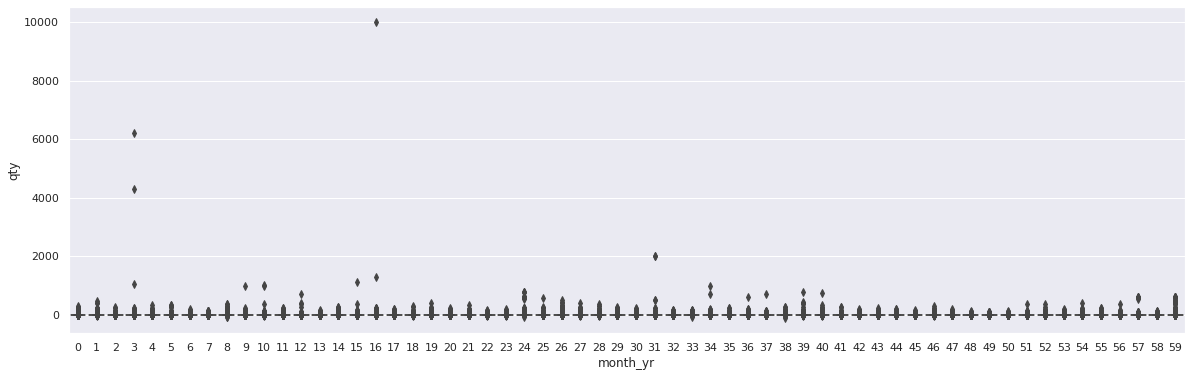

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=df)

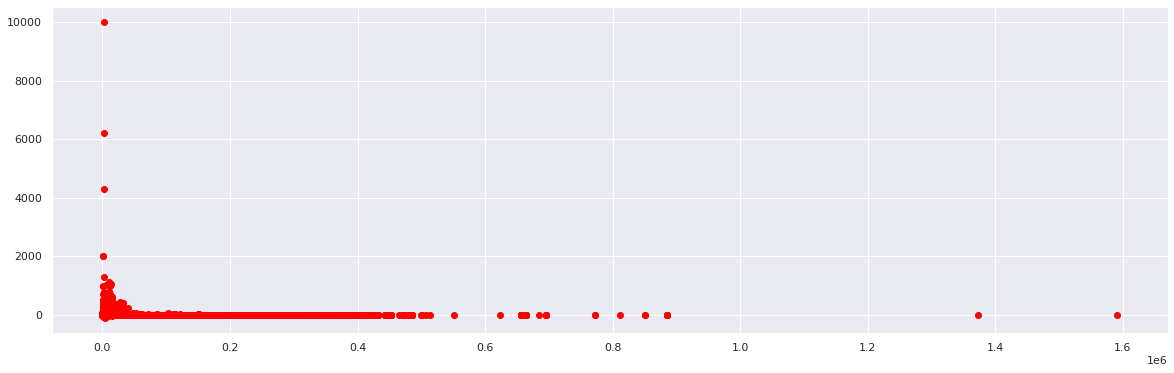

In [ ]:
plt.scatter(df['hargajual'], df['qty'], color = "red")
plt.show()

In [ ]:
35+12

47

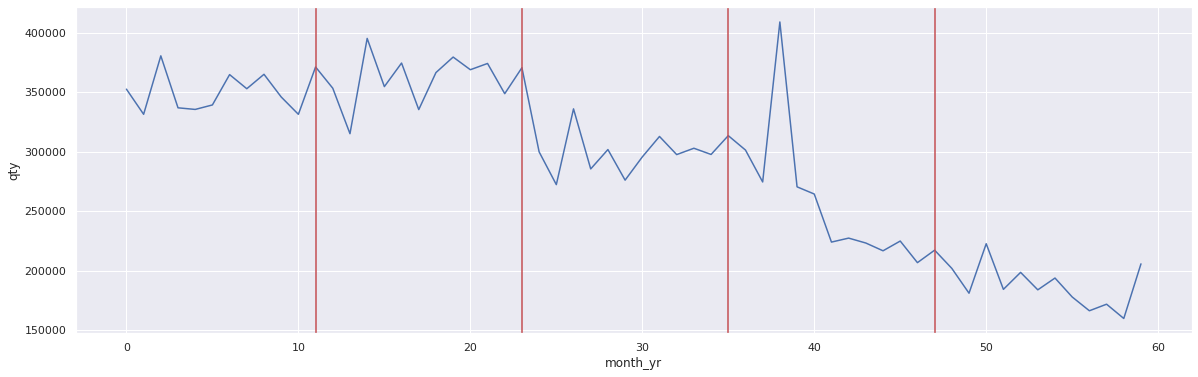

In [ ]:
df_plot = df.groupby(['month_year'],as_index=False).sum()
df_plot.head()
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(x='month_year', y='qty', data=df_plot)
plt.axvline(x=11, ymin=0, ymax=1, color='r')
plt.axvline(x=23, ymin=0, ymax=1, color='r')
plt.axvline(x=35, ymin=0, ymax=1, color='r')
plt.axvline(x=47, ymin=0, ymax=1, color='r')

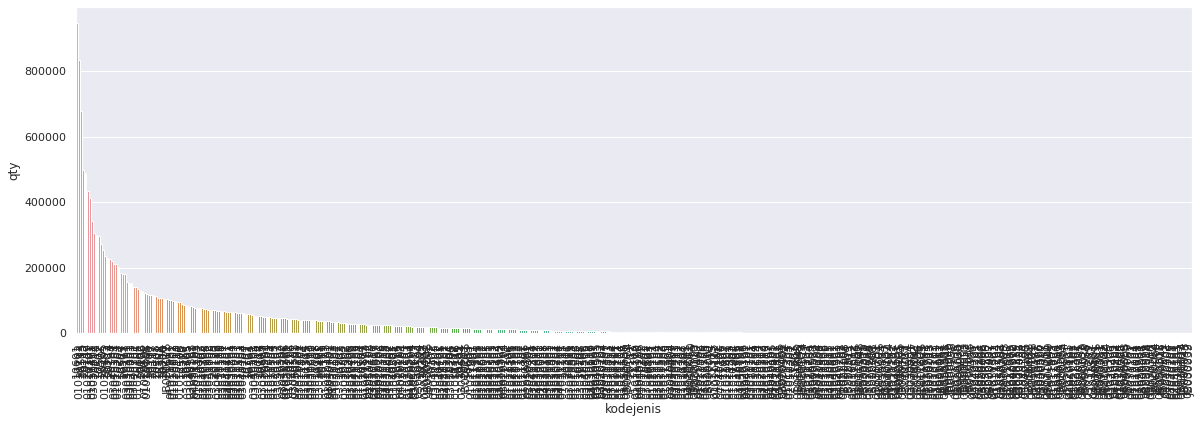

In [ ]:
df_s = df.groupby(['kodejenis'],as_index=False).sum().sort_values("qty", ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='kodejenis', y='qty', data=df_s, )
plt.xticks(rotation=90)
plt.show()

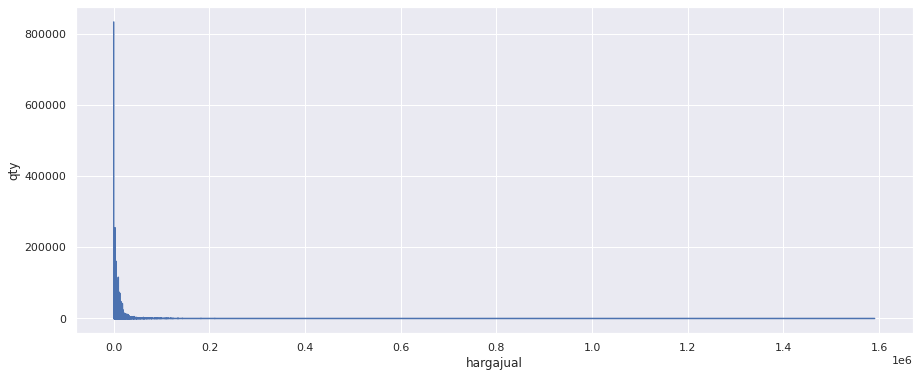

In [ ]:
df_p = df.groupby(['hargajual'],as_index=False).sum()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='hargajual', y='qty', data=df_p)

In [ ]:
# Handling Outliers
# df = df[df['hargajual'] < 6000]
# df = df[df['qty'] < 4000]

In [ ]:
# drop rows wich contains negative and zero values
df[df['qty']<0].count()

In [ ]:
df = df[df['qty']>0]

In [ ]:
# reviewing the outlier of the number of products sold
ax = sns.boxplot(df['qty'])

In [ ]:
df.info() # 8616845 

# Test

In [ ]:
test = df2019.drop(['tgl', 'satuan', 'qty', 'kodejenis', 'kodekategori'], axis=1)

In [ ]:
test.head()

In [ ]:
clean_test = test.drop_duplicates(subset=['barcode'])

In [ ]:
latest_records = monthly_series.drop_duplicates(subset=['barcode'])
X_test = pd.merge(clean_test, latest_records, on=['barcode'], how='left', suffixes=['', '_'])
X_test.fillna(0, inplace=True)
X_test.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
X_test.head()

In [ ]:
X_test = X_test[[(i + (36 - serie_size)) for i in range(serie_size)]]
X_test.head()

In [ ]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test_reshaped.shape)

In [ ]:
lstm_test_pred = gru_model.predict(X_test_reshaped)

In [ ]:
lstm_prediction = pd.DataFrame(clean_test['barcode'], columns=['barcode'])
lstm_prediction['item_cnt_month'] = lstm_test_pred.clip(0., 50.)
lstm_prediction.head()
# lstm_prediction.to_csv('gru_submission.csv', index=False)

In [ ]:
lstm_prediction.head(100)

In [ ]:
# lstm_train_pred = gru_model.predict(X_train)
# lstm_val_pred = gru_model.predict(X_valid)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

# lstm_test_pred = gru_model.predict(X_valid)
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_test_pred)))